## Solutions to Problem Set 8

## Shashank Sule 

### Problem 1 

a) Taking the DFT of the mirrored signal we have that 

$$\hat{g}_{v} = \frac{1}{\sqrt{2N}}\sum_{n=0}^{2N-1}e^{\frac{-2\pi iv}{2N}n}g_n = \frac{1}{\sqrt{2N}}\sum_{n=0}^{N-1}e^{\frac{-2\pi iv}{2N}n}f_n + \frac{1}{\sqrt{2N}}\sum_{n=2N-1}^{N}e^{\frac{-2\pi iv}{2N}(n)}f_{2N-1-n} $$ 

Relabel to get 

$$ \frac{1}{\sqrt{2N}}\sum_{n=0}^{N-1}e^{\frac{-2\pi iv}{2N}n}f_n + \frac{1}{\sqrt{2N}}\sum_{k=0}^{N-1}e^{\frac{-2\pi iv}{2N}(2N-1-k)}f_{k} = \frac{1}{\sqrt{2N}}\sum_{n=0}^{N-1}f_n\Big(e^{\frac{-2\pi iv}{2N}n} + e^{\frac{-2\pi iv}{2N}(2N-1-k)}\Big) = \frac{1}{\sqrt{2N}}\sum_{n=0}^{N-1}f_n\Big(e^{\frac{-2\pi iv}{2N}n} + e^{\frac{-2\pi iv}{2N}2N}e^{\frac{-2\pi iv}{2N}-1}e^{\frac{-2\pi iv}{2N}-n}\Big)$$

$$ = \frac{1}{\sqrt{2N}}\sum_{n=0}^{N-1}f_n\Big(e^{\frac{-2\pi iv}{2N}n} + e^{\frac{-2\pi iv}{2N}-1}e^{\frac{-2\pi iv}{2N}-n}\Big) = \frac{1}{\sqrt{2N}}\sum_{n=0}^{N-1}f_ne^{\frac{i\pi v}{2N}}\Big( e^{\frac{-2\pi iv}{2N}n}e^{\frac{-\pi iv}{2N}n} + e^{\frac{2\pi iv}{2N}n}e^{\frac{\pi iv}{2N}n}\Big) = \sqrt{\frac{2}{N}}e^{\frac{i\pi v}{2N}}\sum_{n=0}^{N-1}f_n\cos{\frac{\pi v}{2N}(2n+1)}$$ 

Thus, if $C$ is the cosine transform then $[C]_v = \sqrt{\frac{N}{2}}e^{-\frac{i\pi v}{2N}}\hat{f}_v$ so $C$ the cos transform matrix is obtained by multiplying each row of the DFT matrix by the phase pre-factor and the normalization factor. 

b) The inverse transform matrix is then the inverse DFT times $\sqrt{\frac{2}{N}}$ with each row multiplied by the conjugate of the phase factor. 

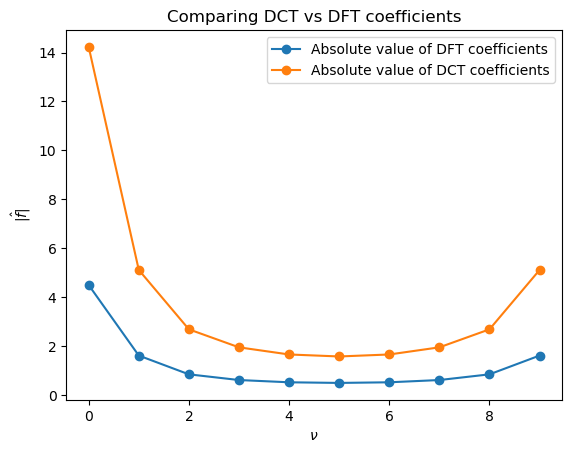

PyObject Text(33.23611111111112, 0.5, '$|\\hat{f}|$')

In [31]:
function DFT(N)
    """ Compute the Discrete Fourier Matrix of the vector f
    """
    
    DFT = zeros(ComplexF64, N,N)
    
    for ν=0:N-1
        for n=0:N-1
            DFT[ν+1,n+1] = exp(-2im*π*n*ν/N)/sqrt(N)
        end
    end
    
    return DFT
end

function CFT(DFT)
    
    #Computes the discrete cosine transform from a DFT matrix
    
    N = size(DFT)[1]
    CFT = zeros(ComplexF64, N,N)
    for ν=0:N-1
        for n=0:N-1
            CFT[ν+1,n+1]=exp(-im*π*ν/2N)*DFT[ν+1,n+1]
        end
    end
    
    return CFT
end



function DFoT(f)
    """ Compute the Discrete Fourier Transform of the vector f
    """
    N = length(f)
    
    fhat = zeros(ComplexF64, N)
    
    for ν=0:N-1
        for n=0:N-1
            fhat[ν+1] += f[n+1]*exp(-2im*π*n*ν/N)/N
        end
    end
    
    return fhat
end

f = [i for i in 0:9]

DFoT(f)

plot(abs.(Out[26]),"o-",label="Absolute value of DFT coefficients")

D = DFT(10)
C = CFT(D)

fct = C*f

plot(abs.(fct),"o-",label="Absolute value of DCT coefficients")
legend();
title("Comparing DCT vs DFT coefficients")
xlabel(L"\nu")
ylabel(L"|\hat{f}|")

In standard DFT we faced lossy compression because we had to do away with high frequency data that had a relatively larger magnitude in spectral space. On the other hand the DCT minimizes the contribution of the high-frequency components thus improving the efficiency of compression 

### Problem 2 

a) $$ \frac{1}{8\pi^3}\int_{\mathbb{R}^3}e^{-i(kx + my + nz)}e^{-(\sigma_x^2 x/2 + \sigma_y y^2/2 + \sigma_z z^2/2} \, dV$$ 

$$= \frac{1}{8\pi^3}\int_{\mathbb{R}}e^{-(\sigma_x^2 x/2 + kx)}\,dx\int_{\mathbb{R}}e^{-(\sigma_y^2 y/2 + ky)}\,dy\int_{\mathbb{R}}e^{-(\sigma_z^2 z/2 + kz)}\,dz$$

We computed each integral in class: 

$$ \frac{1}{8\pi^3}\int_{\mathbb{R}}e^{-(\sigma_x^2 x/2 + kx)}\,dx = e^{\frac{-k^2}{2\sigma}}\sqrt{\frac{2}{\sigma}}\sqrt{\pi} =  e^{\frac{-k^2}{2\sigma}}\sqrt{\frac{2\pi}{\sigma}}$$

The final value of the integral is a product of all such terms: 

$$ \mathcal{F} = e^{\frac{-k^2 -m^2 - n^2}{2\sigma}}\sqrt{\frac{1}{8\pi^3\sigma}} $$

b) Change to spherical co-ordinates. Then the Jacobian is $r^2\sin{\theta}$ where $\theta$ is the latitutdinal angle. 
Let $k = |\textbf{k}|$. $\textbf{x}$ is the radial vector so its dot product with a fixed vector gets us the the product of their magnitude times the latitudinal angle. 

Then the integral becomes 

$$ \frac{1}{8\pi^3}\int_{\mathbb{R}^{+}}\int_{0}^{\pi}\int_{0}^{2\pi}e^{-kr\cos{\theta}}\frac{e^{-Kr}}{r}r^2\sin{\theta}\,d\phi\,d\theta\,dr $$

Using the substitution $u = \cos \theta$ and changing the bounds of the integration to $[1,-1]$ and the jacobian being $-\sin \theta \,d\theta$ we get the following integral: 

$$\frac{1}{8\pi^3}\int_{\mathbb{R}^{+}}\int_{-1}^{1}\int_{0}^{2\pi}re^{-(iku + K)r}\,d\phi\,du\,dr$$

We compute the integral with respect to $r$ first. Integrating by parts, the first term vanishes so we are left with the second integral 

$$ \int_{R}\frac{1}{iku + K}e^{-(iku + K)r} \,dr = \frac{1}{(iku + K)^2}$$.

Now $$\int_{-1}^{1}\frac{1}{(iku + K)^2}\,du = \frac{1}{ik}\big( \frac{1}{K - ik} - \frac{1}{K+ik} \big) = \frac{1}{ik}\frac{1}{K^2 + k^2}$$

Finally the integral on $\phi$ is just $2\pi$. Putting it all together we get 

$$ \mathcal{F} = \frac{1}{4\pi^2}\frac{1}{ik(K^2 + k^2)}$$ 
c) We know from the spectral theorem that $A = Q^{T}DQ$ where $D$ is a diagonal matrix and $Q$ is an orthogonal matrix. Doing a change of variables $y = Qx$ gets us the jacobian as $det(Q^{T})$. Then the integral becomes 

$$ \frac{det(Q^{T})}{8\pi^3}\int_{\mathbb{R}^3}e^{-i\textbf{k}\cdot Q^{T}\textbf{y}}e^{-(2lx^2/2 + 2my^2/2 + 2nz^2/2)} \,dV$$

where $l,m,n$ are the eigenvalues of $A$. Then we are back to the case in part (a) so we get the Fourier transform to be 

$$ \mathcal{F} = \frac{det(Q^{T})}{\sqrt{8\pi^3}}e^{-\frac{a^2}{4l} -\frac{b^2}{4m} - \frac{c^2}{4n}}$$

### Problem 3

a) Let $C$ be a circulant matrix and $\textbf{x}$ be a vector s.t. $\textbf{b} = C\textbf{x}$. Then expanding the multiplication we have that 

$$ \begin{bmatrix} b_0 \\ b_1 \\ \vdots \\ b_{n-1}\end{bmatrix} = \begin{bmatrix} c_0x_0 + c_{n-1}x_1 + \ldots + c_{1}x_{n-1} \\ c_1x_0 + c_{0}x_1 + \ldots + c_{2}x_{n-1} \\ \vdots \\ c_{n-1}x_0 + c_{n-2}x_1 + \ldots + c_{0}x_{n-1} \end{bmatrix} = \begin{bmatrix} \sum_{i=0}^{n-1} x_i c_{1-i} \\ \sum_{i=0}^{n-1} x_i c_{2-i} \\ \vdots \\ \sum_{i=0}^{n-1} x_i c_{n-1-i} \end{bmatrix}$$

Observe that $\textbf{b}_l = \sum_{i=0}^{n-1} x_i c_{k-i}$ so $\textbf{b} = \textbf{x}*\textbf{c}$ where $\textbf{c}$ is the first column of the circulant matrix C. 

b) Let $D$ denote the DFT operator. Then from the convolution theorem we know that $D(g*h) = D(g)D(h)$. Apply this to the equation above: $D(\textbf{b}) = D(\textbf{x})D(\textbf{c})$ where multiplication is component wise. Then $[D(\textbf{x})]_k = \frac{[D(\textbf{b})]_k}{[D(\textbf{c})]_k}$. Taking the IDFT of $D(\textbf{x})$ will recover the desired vector.  

In [6]:
using Pkg
Pkg.add("FFTW")

 Resolving package versions...
 Installed Compat ───────────── v2.1.0
 Installed Tokenize ─────────── v0.5.3
 Installed CSTParser ────────── v0.5.2
 Installed OrderedCollections ─ v1.1.0
 Installed FFTW ─────────────── v0.2.4
 Installed PlotUtils ────────── v0.5.8
 Installed StatsBase ────────── v0.30.0
 Installed BinaryProvider ───── v0.5.4
 Installed MacroTools ───────── v0.5.0
 Installed AbstractFFTs ─────── v0.4.0
 Installed GR ───────────────── v0.39.1
  Updating `~/.julia/environments/v1.1/Project.toml`
  [7a1cc6ca] + FFTW v0.2.4
  Updating `~/.julia/environments/v1.1/Manifest.toml`
  [621f4979] + AbstractFFTs v0.4.0
  [b99e7846] ↑ BinaryProvider v0.5.3 ⇒ v0.5.4
  [00ebfdb7] + CSTParser v0.5.2
  [34da2185] ↑ Compat v2.0.0 ⇒ v2.1.0
  [7a1cc6ca] + FFTW v0.2.4
  [28b8d3ca] ↑ GR v0.38.1 ⇒ v0.39.1
  [1914dd2f] ↑ MacroTools v0.4.5 ⇒ v0.5.0
  [bac558e1] ↑ OrderedCollections v1.0.2 ⇒ v1.1.0
  [995b91a9] ↑ PlotUtils v0.5.5 ⇒ v0.5.8
  [2913bbd2] ↑ StatsBase v0.29.0 ⇒ v0.30.0
  [0796e94c] +

In [32]:
using FFTW

c = rand(1000)
b = rand(1000)
#Making the circulant matrix 

function Circulant(c)
    N = size(c)[1]
    permutation = [i for i in 1:N-1]
    permutation = vcat(N, permutation)
    CirculantMatrix = zeros(N,N)

    for i in 1:N
        CirculantMatrix[:,i] = c
        permute!(c,permutation)
    end

    return CirculantMatrix 
end

C = Circulant(c);

In [33]:
#Solving via FFT 
@time x = ifft(fft(b)./fft(c))
#Solving via circulant 
@time C \ b

  0.000624 seconds (173 allocations: 104.109 KiB)
  0.038380 seconds (9 allocations: 7.645 MiB)


1000-element Array{Float64,1}:
  0.004066481201446904
 -0.08456165660258605 
  0.02053432266413163 
  0.03854224012267061 
 -0.13685599715655486 
  0.046594197681674485
 -0.10613709882282588 
 -0.062088289379778124
 -0.027320626020475042
  0.05680550751178914 
  0.04037843512184278 
 -0.028633484813375236
 -0.06772617455131523 
  ⋮                   
 -0.09656858986273364 
 -0.0530156766429748  
 -0.05927557809334655 
  0.14362958099223416 
  0.037106220982018004
 -0.12897873839934312 
 -0.022323279582766347
 -0.06795087809947173 
 -0.022756061896193808
  0.05866528584004468 
 -0.008308055139793588
 -0.08186227797433021 

In [34]:
#SOlving a 10^7 system 

c = rand(10000000)
b = rand(10000000)
C = Circulant(c)
#Solving via FFT 
@time x = ifft(fft(b)./fft(c))
#Solving via circulant 
@time C \ b

julia(2555,0x112c0e5c0) malloc: can't allocate region
*** mach_vm_map(size=800000000000000) failed (error code=3)
julia(2555,0x112c0e5c0) malloc: *** set a breakpoint in malloc_error_break to debug


OutOfMemoryError: OutOfMemoryError()

The compiler ran out of memory! Anyway, even at 10^3, the fft method was a hundred times faster than the backslash operator. 

### Problem 4

a) For convenience of notation, set $\zeta = e^{2\pi i/n}$. We know that if $\textbf{v}_j$ is the vector of powers of $\zeta^j$, then 

$$ [\textbf{b}]_k = [C\textbf{v}_j]_k = \sum_{i=0}^{n-1}\zeta^{ij}c_{k-i} = \zeta^{jk}\sum_{i=0}^{n-1}\zeta^{ij-jk}c_{k-i} = \zeta^{jk}\sum_{i=0}^{n-1}\zeta^{j(i-k)}c_{k-i} = \zeta^{jk}\sum_{i=0}^{n-1}\zeta^{j(i-k)}c_{-(i-k)}$$

Now to compute the last summation, I'll use arithmetic mod n, because both terms in the summation are cyclic mod n. It is a constant independent of $k$ because 

$$\sum_{i=0}^{n-1}\zeta^{j(i-k)}c_{-(i-k)} = \sum_{i=k}^{n-1}\zeta^{j(i-k)}c_{-(i-k)} + \sum_{i=0}^{k-1}\zeta^{j(i-k)}c_{-(i-k)}$$

Relabeling $i-k$ as $l$ we have that when $i=k$, $l=0$ and when $i=k-1$, $l=n-1-k$. Furthermore, when $i=0$, $l = -k = n-k$ and when $i=k-1$, $l = k - 1 - k = -1 = n-1$. Thus the above summation becomes 

$$ \sum_{l=0}^{n-1-k}\zeta^{jl}c_{-l} + \sum_{l=n-k}^{n-1}\zeta^{jl}c_{-l} = \sum_{l=0}^{n-1}\zeta^{jl}c_{-l} = \lambda_j$$. 

Now this column is simply the convolution from the previous problem with $k=0$. This is a constant that doesn't depend on $k$, it only depends on the power of $\zeta$, $j$. 

Thus, $\textbf{b} = \lambda_j\textbf{v}_j$, so $\textbf{v}_j$ is an eigenvector with eigenvalue $$\lambda_j = \sum_{l=0}^{n-1}\zeta^{jl}c_{-l} = \begin{bmatrix}c_0 & c_{n-1} & \ldots & c_1 \end{bmatrix}\textbf{v}_j$$. 

b) $V = \sqrt{N}F^{*}$, which is the conjugate transpose of $F$. Since $F$ is a unitary matrix we have that $V = \sqrt{N}F^{-1}$. 

c) Since $\lambda_j = \textbf{c}\textbf{v}_j$, if we construct a row vector of eigenvalues $\lambda$, then $\lambda = \textbf{c}V$. Then to find $\lambda$ as a column vector we take the transpose conjugate of both sides to get $\lambda^{*} = V^{*}\textbf{c^{T}} = F\textbf{c^{T}}$ where $\textbf{c}$ is the first row of the circulant matrix. So the algorithm is to extract the first row and apply a DFT to it. Of course, as we are dealing with real matrices, any imaginary eigenvalues come in conjugate pairs, so it isn't necessary to take a conjugate. 

In [35]:
using FFTW
c = rand(1000)
C = Circulant(c)
@time eigenvalues = fft(C[1,:])

  0.000131 seconds (58 allocations: 42.563 KiB)


1000-element Array{Complex{Float64},1}:
   503.16348212280207 + 0.0im                
   4.9043624419906715 - 11.31674248096461im  
    8.301746519278593 + 3.0310499729061915im 
  -0.8966468567946371 - 4.535515840574838im  
  -4.4333827834119655 - 4.706759585822979im  
    -8.59109355792843 - 7.114306375566055im  
  -0.2129868340381591 + 13.230504896353128im 
  -3.2955984918718992 - 1.8424932124777156im 
    6.014305918103828 - 6.9174508129768215im 
   14.613989478741006 - 0.15765135896482496im
   11.155967173037904 - 7.245706522730568im  
    3.127739563713197 - 9.405540116091744im  
    1.844581032830515 + 5.094784578638368im  
                      ⋮                      
   1.8445810328305146 - 5.094784578638366im  
   3.1277395637131944 + 9.405540116091743im  
   11.155967173037906 + 7.245706522730572im  
   14.613989478741006 + 0.15765135896482785im
    6.014305918103828 + 6.917450812976819im  
  -3.2955984918719006 + 1.8424932124777156im 
 -0.21298683403815954 - 13.2305048963531

In [11]:
using LinearAlgebra

@time eigvals(C)

  0.877782 seconds (19 allocations: 7.936 MiB)


1000-element Array{Complex{Float64},1}:
   497.30011218196825 + 0.0im                
  -21.025070581254816 + 10.64599911292192im  
  -21.025070581254816 - 10.64599911292192im  
   -16.86766675021001 + 16.75099450884864im  
   -16.86766675021001 - 16.75099450884864im  
  -18.331093449610876 + 11.630178131807615im 
  -18.331093449610876 - 11.630178131807615im 
   -16.42612362088977 + 13.302139153197146im 
   -16.42612362088977 - 13.302139153197146im 
    20.93641246754354 + 10.140536783936113im 
    20.93641246754354 - 10.140536783936113im 
    7.904073576186808 + 20.119546088375284im 
    7.904073576186808 - 20.119546088375284im 
                      ⋮                      
 -0.32209851445626203 + 0.7566709224586796im 
 -0.32209851445626203 - 0.7566709224586796im 
  -0.9312510459594154 + 0.2669243944313008im 
  -0.9312510459594154 - 0.2669243944313008im 
 -0.17164994705002157 + 0.5156232062486428im 
 -0.17164994705002157 - 0.5156232062486428im 
 -0.09657854926853993 + 0.08291964735810